In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Transfer Learning:

## Keras Applications
[Keras Applications](https://keras.io/api/applications/#:~:text=Keras%20Applications%20are%20deep%20learning,extraction%2C%20and%20fine%2Dtuning.&text=Upon%20instantiation%2C%20the%20models%20will,Keras%20configuration%20file%20at%20~%2F.)are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

When loading a model from Keras we get at least 2 basic custom options:
* `weights='dataset'` Enables us download the weights from obtained from traninning on a specific data set

* `include_top (boolean)` If true Model is downloaded completly, else (False) the last layer is decapitaed, so you can create a new last layer to classfie different things

**Examples:**
<br>
Classify ImageNet classes with ResNet50:

Predicted:
as golden_retriever, with probability 35.63 %
as Labrador_retriever, with probability 32.59 %
as Great_Pyrenees, with probability 14.57 %
as chow, with probability 5.33 %


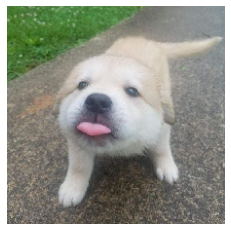

In [56]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions



### Load model with weights obtained from training with imagenet dataset ###
model = ResNet50(weights='imagenet', include_top=True)                    # stored at ~/.keras/models/.

### load an image ###
img_path = 'images\dogie.jpg'                           # Path to Image
img = image.load_img(img_path, target_size=(224, 224))  # Use image to load imate and reshape it to targe size
x = image.img_to_array(img)                             # Convert to numpy array
xa = np.expand_dims(x, axis=0)                          # expand axis (need in order to make a single prediction)
xa = preprocess_input(xa)                               # Make some extra process steps

preds = model.predict(xa)                               # Make prediction
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

def make_prediction(img,n):
    plt.imshow(img)
    plt.axis('off')
    print('Predicted:')
    for clas,desc,prob in decode_predictions(preds, top=n)[0]:
        print(f"as {desc}, with probability {round(prob*100,2)} %")
        
make_prediction(img,n=4)

## Tensorflow Hub
[TensorFlow Hub](https://www.tensorflow.org/hub) is a library for the publication, discovery, and consumption of reusable parts of machine learning models. A module is a self-contained piece of a TensorFlow graph, along with its weights and assets, that can be reused across different tasks in a process known as transfer learning. Transfer learning can:
* Train a model with a smaller dataset,
* Improve generalization, and
* Speed up training.

#### Import and build Tensorflow Hub MobileNet v1 model

We'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the [Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4) for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.


```python
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
```

In [45]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model, Sequential

### Load Model ###
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4" # Get model from TensorFlow Hub
model = Sequential([hub.KerasLayer(module_url)])                                       # Load model
model.build(input_shape=[None, 160, 160, 3])                                           # Decleare Shape
model.summary()                                                                        # Check layer 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


In [46]:
### load an image ###
img_path = 'images\dogie.jpg'                           # Path to Image
img = image.load_img(img_path, target_size=(160, 160))  # Use image to load imate and reshape it to targe size

In [50]:
# Read in categories text file
with open('images/imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

print(categories)

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', '

In [57]:
import pandas as pd

def get_top_5_predictions(img):
    x = image.img_to_array(img)[np.newaxis, ...] / 255.0  # Convert image to array
    preds = model.predict(x)                              # Make predictions
    top_preds = pd.DataFrame(columns=['prediction'],      # Create a Pd Data Frame
                             index=np.arange(5)+1)
    
    sorted_index = np.argsort(-preds[0])                  # Sort predictions 
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

get_top_5_predictions(img)

,prediction
1,flatworm
2,cinema
3,obelisk
4,space shuttle
5,guillotine
